# DBSCAN (Density Based Spatial Clustring Applications with Noise)
- Core Point -> If there are enough data point around (If it creates density)
- Border Point -> Near to a core point doesn't create density by itself 
- Outlier -> Not a member of any cluster
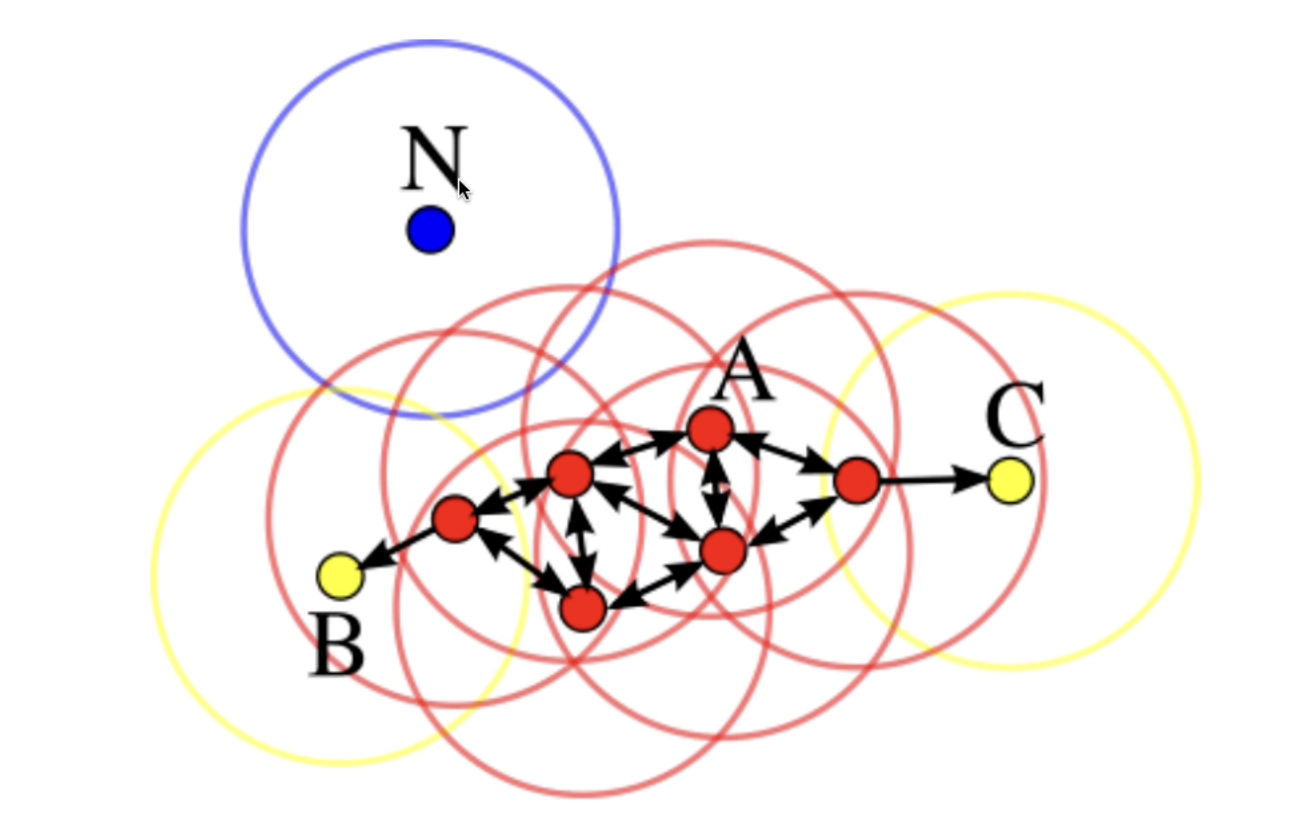

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sys 
import warnings 

%matplotlib inline
sys.path.append('/Users/user/Desktop/Projects/data-science/utils')
warnings.filterwarnings(action="ignore")


In [2]:
from SetupDataFrame import SetupDataFrame
from AnalyzeDataFrame import AnalyzeDataFrame
from VisualizeDataFrame import VisualizeDataFrame
from EvalModel import EvalModel
from HyperParameterTuning import HyperParameterTuning
from PreprocessDataFrame import PreprocessDataFrame

In [3]:
setup_df         =   SetupDataFrame()
analyze_df       =   AnalyzeDataFrame()
visualize_df     =   VisualizeDataFrame()
eval_model       =   EvalModel()
hp_tuning_model  =   HyperParameterTuning()
preprocess_model =   PreprocessDataFrame()

In [5]:
df = setup_df.setup_ml("28-urban_pedestrian_locations_with_labels.csv")

In [7]:
analyze_df.check_df(df)

***************************************** SHAPE ******************************************
(500, 3)
***************************************** TYPES ******************************************
x_position      float64
y_position      float64
true_cluster      int64
dtype: object
****************************************** HEAD ******************************************
   x_position  y_position  true_cluster
0    0.830586   -0.447733             1
1    0.701678    0.816918             0
2    1.022080   -0.492571             1
3   -0.316765    0.953438             0
4    0.293226    1.057185             0
****************************************** TAIL ******************************************
     x_position  y_position  true_cluster
495    0.239754    0.985462             0
496    0.072145    0.184834             1
497    0.590273   -0.365577             1
498    1.619465   -0.283658             1
499    0.228960    1.063974             0
******************************************* NA **

In [8]:
analyze_df.analyze_df(df)

**************************************** COLUMNS *****************************************
Index(['x_position', 'y_position', 'true_cluster'], dtype='object')
**************************************** DF INFO *****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   x_position    500 non-null    float64
 1   y_position    500 non-null    float64
 2   true_cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB
None
************************************** DF DESCRIBE ***************************************
       x_position  y_position  true_cluster
count  500.000000  500.000000    500.000000
mean     0.504536    0.251342      0.500000
std      0.870047    0.498529      0.500501
min     -1.079039   -0.605083      0.000000
25%     -0.030705   -0.223623      0.000000
50%      0.484762   

<Axes: xlabel='x_position', ylabel='y_position'>

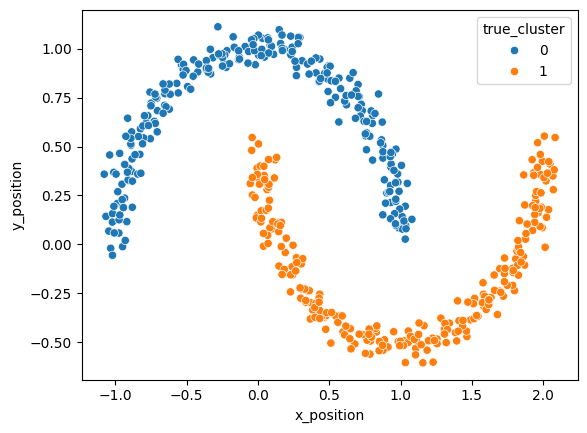

In [9]:
sns.scatterplot(df, x="x_position", y="y_position", hue="true_cluster")

In [10]:
df = df.drop("true_cluster", axis=1)

In [11]:
df

,x_position,y_position
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185
...,...,...
495,0.239754,0.985462
496,0.072145,0.184834
497,0.590273,-0.365577
498,1.619465,-0.283658


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df) 

In [13]:
from sklearn.cluster import DBSCAN

model = DBSCAN()

model.fit(X_scaled)

model.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [14]:
X_scaled = pd.DataFrame(data=X_scaled, columns=["x_position", "y_position"])

<Axes: xlabel='x_position', ylabel='y_position'>

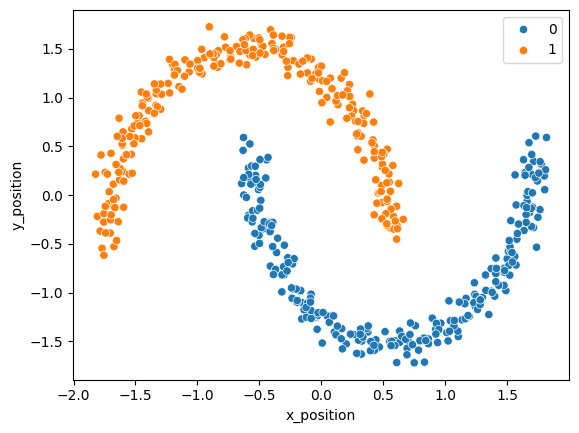

In [16]:
sns.scatterplot(data=X_scaled, x="x_position", y="y_position", hue=model.labels_)

In [17]:
from sklearn.cluster import HDBSCAN

model = HDBSCAN()

model.fit(X_scaled)

HDBSCAN()

In [18]:
model.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

<Axes: xlabel='x_position', ylabel='y_position'>

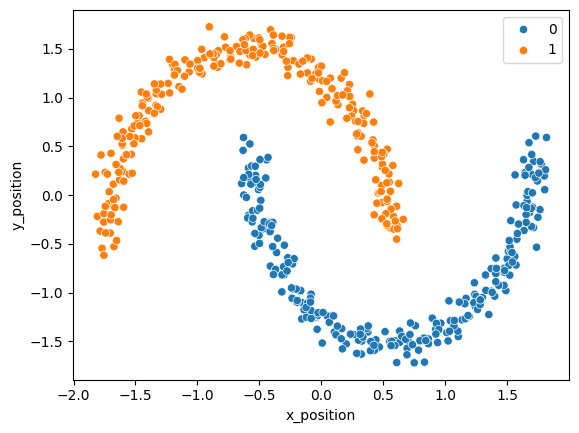

In [19]:
sns.scatterplot(data=X_scaled, x="x_position", y="y_position", hue=model.labels_)